## 🚨 Warning 🚨

This Notebook builds on 1_Introduction.

You have to run that Notebook (if you didn't already) and mount your Google Drive to this Notebook via
```python
from google.colab import drive
drive.mount('/content/drive')
```
then you are ready to go!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Nifti Data

Nifti (Neuroimaging Informatics Technology Initiative) is the standard file format (`.nii` or `.nii.gz`) to store medical imaging data. It originates from DICOM data which is the output format from medical imaging

It holds:

- 3D/4D data array, containing 3D pixels called **voxels**
- coordinate system (affine)
- additional infos (header)


## 1. Reading Niftis
[Nibabel](https://github.com/nipy/nibabel) is one of the most popular python libraries for loading Nifti files among [AntsPy](https://github.com/ANTsX/ANTsPy) and [SimpleITK](https://github.com/SimpleITK/SimpleITK).

Loading a Nifti can easily be done via

```python
import nibabel as nib

img = nib.load('drive/MyDrive/openneuro/ds000001/sub-01/anat/sub-01_T1w.nii.gz')
```
and the data array within the Nifti can be loaded via
```python
x = img.get_fdata()
```

**Task 1.1:** Find out the shape and dtype of the data array


**Task 1.2:** Print the affine and the header of the Nifti image (use the infos from the [Nibabel doc](https://nipy.org/nibabel/nifti_images.html))

## Exercise

1. Plot the middle slice of the data array (Hint: `cmap='gray'` to make it less ugly)

2. Plot three middle slices - one for each dimension - and plot them side by side

3. Write it as a function which takes a filepath and returns a matplotlib Figure containing the plot from 2.

4. For each "sub-XY_T1w.nii.gz" file in the ds000001-dataset apply the function and save the Figure in a new folder on your Google Drive

## 2. Modifiying Niftis

To modify the image data, first the Nifti must be loaded:

```python
import nibabel as nib

img = nib.load('drive/MyDrive/openneuro/ds000001/sub-01/anat/sub-01_T1w.nii.gz')
x = img.get_fdata()
```
Since the data array `x` is a NumPy array, modifications are straightforward:
```python
x[:80, :, :] = 0
```
Using the affine and header from the original we **create the new Nifti** via
```python
img_new = nib.Nifti1Image(x, img.affine, img.header)
```
and **save** it
```python
img_new.to_filename('sub-01_T1w_half.nii.gz')
```

**Task 2.1:** Run the above code and use the [Papaya Viewer](https://www.fmrib.ox.ac.uk/ukbiobank/group_means/index.html) to display the "sub-01_T1w_half.nii.gz".

**Task 2.2:** Create "sub-01_T1w_clipped.nii.gz" in which all voxels from the original larger than 300 are set to 300.

**Task 2.3:** Create "sphere.nii.gz" where the data array is created with the following function

```python
import numpy as np

def sphere_array(shape=(160, 192, 192), radius=10):
  x, y, z = np.arange(shape[0]), np.arange(shape[1]), np.arange(shape[2])
  x, y, z = np.meshgrid(x, y, z, indexing='ij')
  c = np.array(shape) // 2
  sphere_mask = ((x - c[0])**2 + (y - c[1])**2 + (z - c[2])**2) < radius**2
  array = np.zeros(shape)
  array[sphere_mask] = 100
  return array
```

### Pitfall: Nifti Orientation

The data arrays inside of Niftis are not fixed to any orientation.

~90% of Niftis are oriented in the [RAS orientation](https://nipy.org/nibabel/image_orientation.html).

In the remaining cases the data arrays (+ the affines) dimensions are either
- permuted and/or
- inverted

resulting in 47 possible orientations besides the RAS orientation.

Lets have a look at such a pitfall Nifti where the axial dimension is inverted:


In [ ]:
#@title Creating pitfall_nifti.nii.gz 😎
import nibabel as nib

img = nib.load('drive/MyDrive/openneuro/ds000001/sub-10/anat/sub-10_T1w.nii.gz')
orientation = np.array([[0, 1],
                        [1, 1],
                        [2, -1]])  # flipped last (axial) dimension
img_reoriented = img.as_reoriented(orientation)
img_reoriented.to_filename('pitfall_nifti.nii.gz')

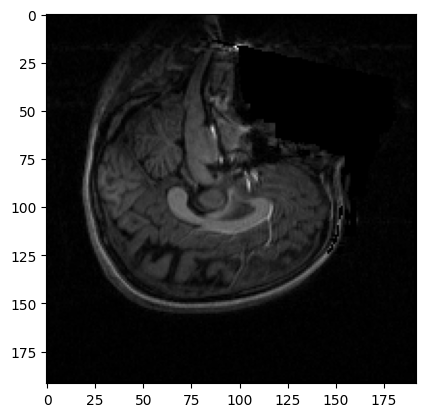

In [ ]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

img = nib.load('pitfall_nifti.nii.gz')
x = img.get_fdata()
plt.imshow(np.rot90(x[80]), cmap='gray');

#### Avoid orientation pitfall

To **asure that each Nifti is in the RAS orientation you should use `nib.as_closest_canonical`**

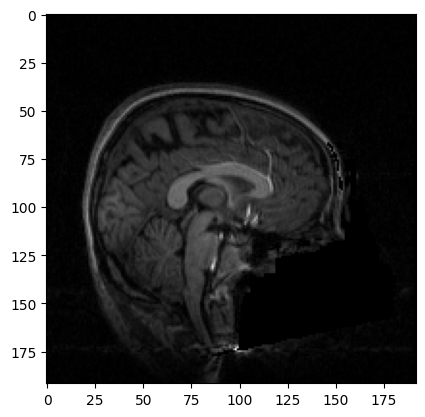

In [ ]:
img = nib.load('pitfall_nifti.nii.gz')
img = nib.as_closest_canonical(img)
x = img.get_fdata()
plt.imshow(np.rot90(x[80]), cmap='gray');

## `niftiview` Exercise
![niftiview_logo_transparent_small](https://repository-images.githubusercontent.com/875620357/02caf846-cb7c-402d-a598-39f6ea64745e)

[`niftiview`](https://github.com/codingfisch/niftiview) simplifies the visualization of Niftis **a lot** (see [examples](https://github.com/codingfisch/niftiview/blob/main/examples/1_image.ipynb))!

*No worries, it was still worth it to struggle with matplotlib to learn stuff*

Let's redo the previous exerise using `niftiview`!

0. Install niftiview package

1. Plot the middle slice of `sub-01_T1w.nii.gz`

2. Plot three middle slices - one for each dimension - and plot them side by side

3. Plot all "sub-XY_T1w.nii.gz" files in the ds000001-dataset in one image with filenames

*Reading the [niftiview-README](https://github.com/codingfisch/niftiview) is a good idea!*